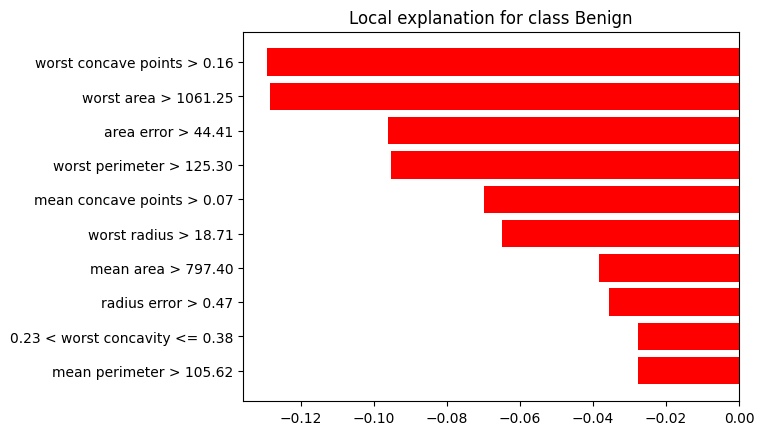

In [8]:
# 1. Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lime import lime_tabular
import matplotlib.pyplot as plt

# 2. Data Loading and Preprocessing
# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Model Building
# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Applying LIME
# Initialize a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                              feature_names=X_train.columns,
                                              class_names=['Malignant', 'Benign'],
                                              mode='classification')

# Select an instance to explain
idx = 1  # Change this to any index of X_test
instance = X_test.iloc[idx]

# Define a wrapper function for predict_proba
def predict_proba_wrapper(X):
    if len(X.shape) == 1:
        # Reshape if a single instance and convert to DataFrame
        X = pd.DataFrame([X], columns=X_train.columns)
    else:
        # Convert to DataFrame
        X = pd.DataFrame(X, columns=X_train.columns)
    return clf.predict_proba(X)

# Explain the prediction made by the model using the wrapper function
exp = explainer.explain_instance(data_row=instance.values,
                                 predict_fn=predict_proba_wrapper,
                                 num_features=10)



# 5. Visualization and Interpretation
# Display the explanation
# Generate the explanation as a pyplot figure
fig = exp.as_pyplot_figure()
plt.show()


